In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
import scipy.stats as st
from scipy.stats import shapiro
from IPython.display import Image
import math
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


In [2]:
df=pd.read_excel(r"C:\Users\lavan\Downloads\compactiv.xlsx")

In [3]:
df.shape

(8192, 22)

In [4]:
df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [6]:
# Access columns and store them in the 'object' variable
object_columns = df.select_dtypes(include=['object']).columns

# Access numerical columns and store them in the 'numeric' variable
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

print("Number of Object Columns:", len(object_columns))
print(object_columns)

print("\nNumber of Numeric Columns:", len(numeric_columns))
print(numeric_columns)

Number of Object Columns: 1
Index(['runqsz'], dtype='object')

Number of Numeric Columns: 21
Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'usr'],
      dtype='object')


In [7]:
value_counts = df['runqsz'].value_counts()
print("Value Counts for Your Column:")
print(value_counts)

Value Counts for Your Column:
Not_CPU_Bound    4331
CPU_Bound        3861
Name: runqsz, dtype: int64


In [8]:
# Assuming 'df' is your DataFrame
num_duplicate_rows = df.duplicated().sum()
print("Number of Rows with Duplicates:", num_duplicate_rows)

Number of Rows with Duplicates: 0


In [9]:
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [10]:
df.isnull().mean()*100

lread       0.000000
lwrite      0.000000
scall       0.000000
sread       0.000000
swrite      0.000000
fork        0.000000
exec        0.000000
rchar       1.269531
wchar       0.183105
pgout       0.000000
ppgout      0.000000
pgfree      0.000000
pgscan      0.000000
atch        0.000000
pgin        0.000000
ppgin       0.000000
pflt        0.000000
vflt        0.000000
runqsz      0.000000
freemem     0.000000
freeswap    0.000000
usr         0.000000
dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [12]:
# Get the count of each data type in the DataFrame
data_type_counts = df.dtypes.value_counts()

# Display the counts
print(data_type_counts)

float64    13
int64       8
object      1
dtype: int64


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lread,8192.0,1.955969e+01,53.353799,0.0,2.0,7.0,20.000,1845.00
lwrite,8192.0,1.310620e+01,29.891726,0.0,0.0,1.0,10.000,575.00
scall,8192.0,2.306318e+03,1633.617322,109.0,1012.0,2051.5,3317.250,12493.00
sread,8192.0,2.104800e+02,198.980146,6.0,86.0,166.0,279.000,5318.00
swrite,8192.0,1.500582e+02,160.478980,7.0,63.0,117.0,185.000,5456.00
fork,8192.0,1.884554e+00,2.479493,0.0,0.4,0.8,2.200,20.12
exec,8192.0,2.791998e+00,5.212456,0.0,0.2,1.2,2.800,59.56
rchar,8088.0,1.973857e+05,239837.493526,278.0,34091.5,125473.5,267828.750,2526649.00
wchar,8177.0,9.590299e+04,140841.707911,1498.0,22916.0,46619.0,106101.000,1801623.00
pgout,8192.0,2.285317e+00,5.307038,0.0,0.0,0.0,2.400,81.44


In [14]:
numeric_df=pd.DataFrame()
categorical_df=pd.DataFrame()

In [15]:
for column in df.columns:
    if df[column].dtype in ['int64','float64']:
        numeric_df[column]=df[column]
    elif df[column].dtype=='object':
         categorical_df[column]=df[column]

In [16]:
numeric_df.shape

(8192, 21)

In [17]:
categorical_df.shape

(8192, 1)

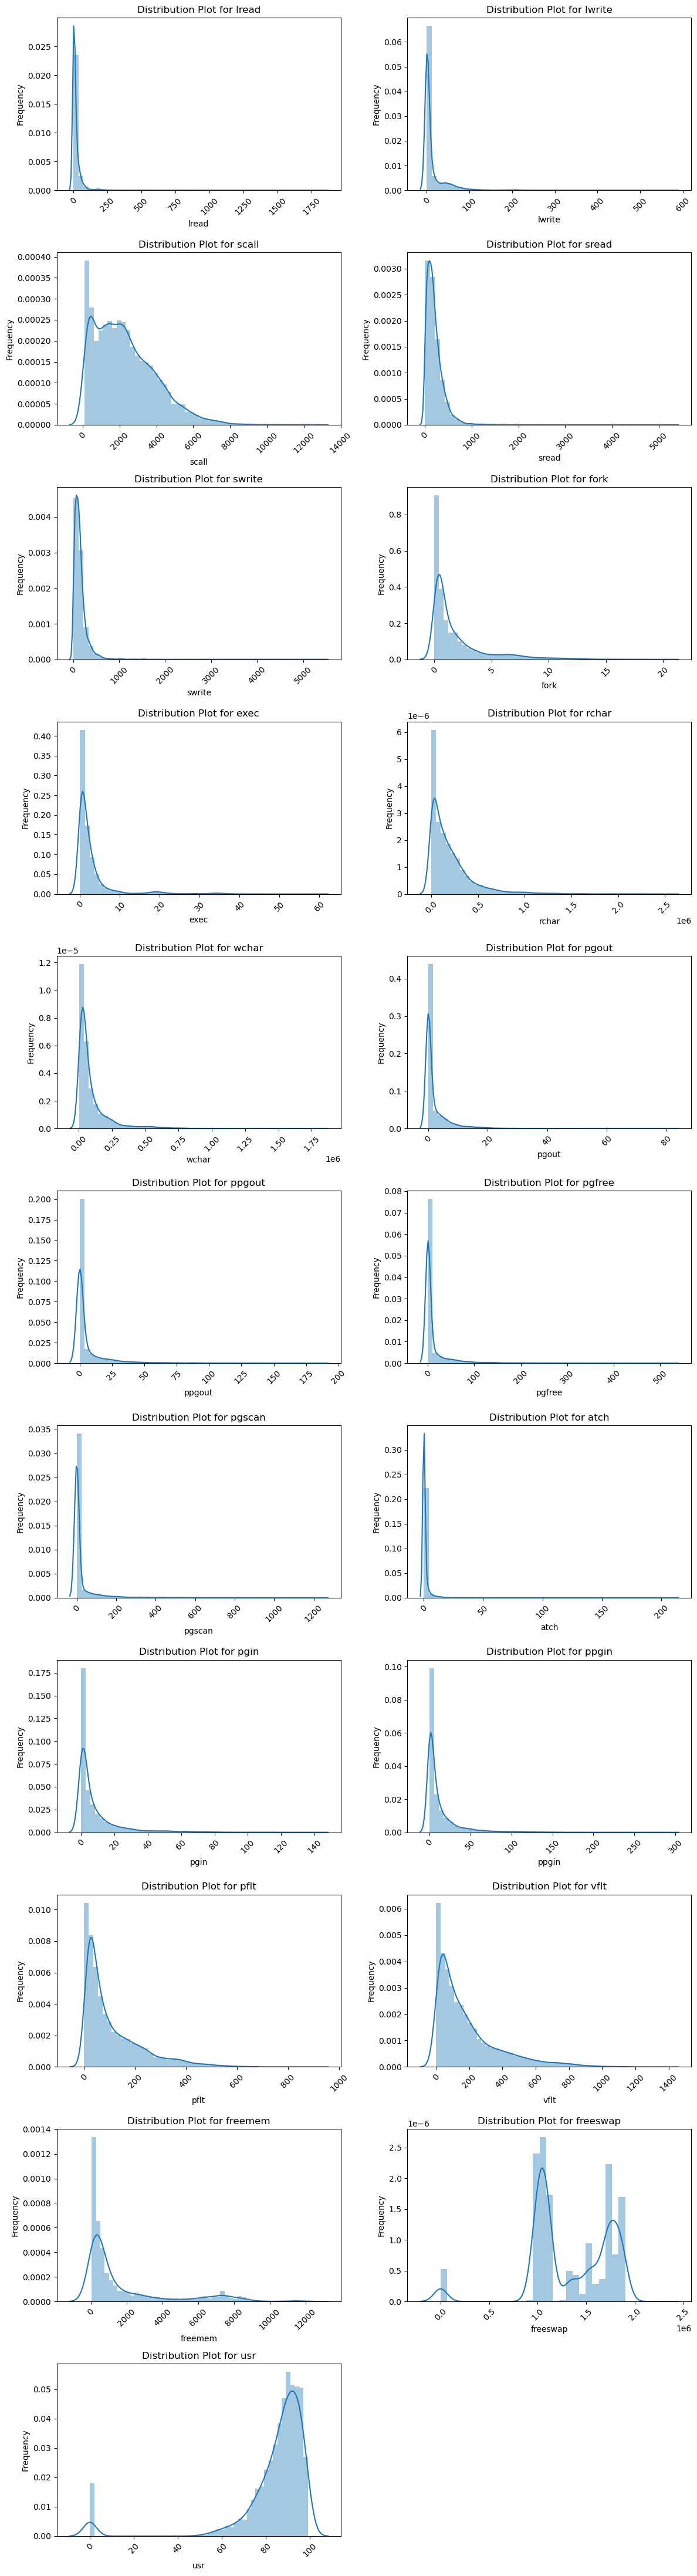

In [18]:
# Calculate the number of rows and columns for the subplots
num_numerical_columns = len(numeric_df.columns)
num_rows = math.ceil(num_numerical_columns / 2)
num_cols = min(num_numerical_columns, 2)

# Create a figure with the dynamically calculated grid size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))

# Flatten the axes array if it's not already flattened
if num_rows > 1 and num_cols > 1:
    axes = axes.flatten()
elif num_rows == 1 or num_cols == 1:
    axes = [axes]
    # Loop through numerical columns
for i, column in enumerate(numeric_df.columns):
    sns.distplot(numeric_df[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution Plot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)
    
# Remove any unused subplots
for j in range(num_numerical_columns, len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

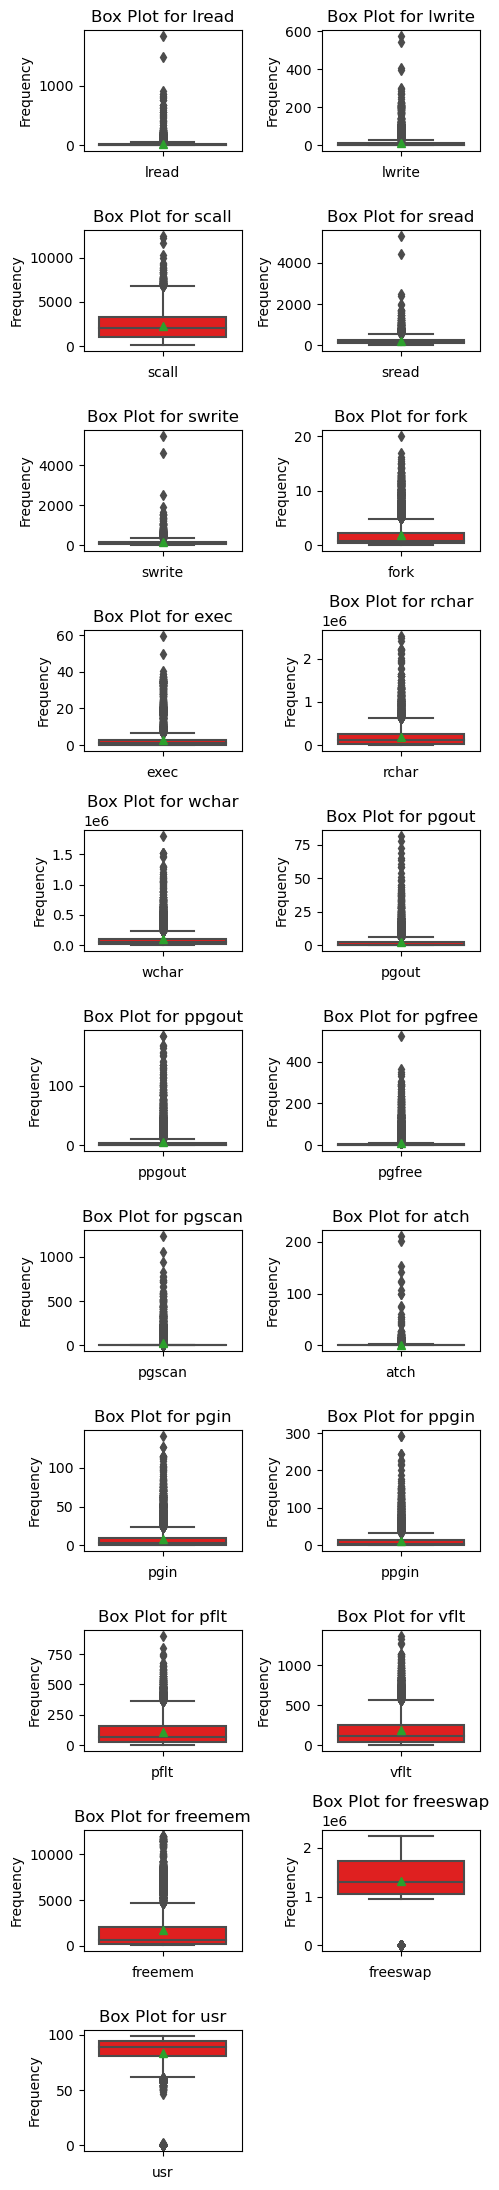

In [19]:
# Calculate the number of rows and columns for the subplots
num_numerical_columns = len(numeric_df.columns)
num_rows = math.ceil(num_numerical_columns / 2)
num_cols = min(num_numerical_columns, 2)

# Create a figure with the dynamically calculated grid size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 2 * num_rows))

# Flatten the axes array if it's not already flattened
if num_rows > 1 and num_cols > 1:
    axes = axes.flatten()
elif num_rows == 1 or num_cols == 1:
    axes = [axes]
    # Loop through numerical columns
for i, column in enumerate(numeric_df.columns):
    sns.boxplot(y=numeric_df[column], ax=axes[i], showmeans=True,color='red',orient='v')
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)
    
# Remove any unused subplots
for j in range(num_numerical_columns, len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [20]:
# Define a function to find outliers using the IQR method
def find_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers

# Create a DataFrame to store the count of outliers for each numerical variable
outlier_counts = pd.DataFrame(columns=['Variable', 'Outlier Count'])

# Iterate through each numerical variable in your DataFrame
for column in df.select_dtypes(include=['number']).columns:
    outliers = find_outliers_iqr(df[column])
    outlier_count = outliers.sum()
    outlier_counts = outlier_counts.append({'Variable': column, 'Outlier Count': outlier_count}, ignore_index=True)

# Display the outlier counts
print(outlier_counts)


    Variable Outlier Count
0      lread           753
1     lwrite          1305
2      scall           108
3      sread           340
4     swrite           495
5       fork           943
6       exec           710
7      rchar           453
8      wchar           817
9      pgout           988
10    ppgout          1315
11    pgfree          1555
12    pgscan          1744
13      atch          1209
14      pgin           789
15     ppgin           821
16      pflt           395
17      vflt           484
18   freemem          1185
19  freeswap           294
20       usr           430


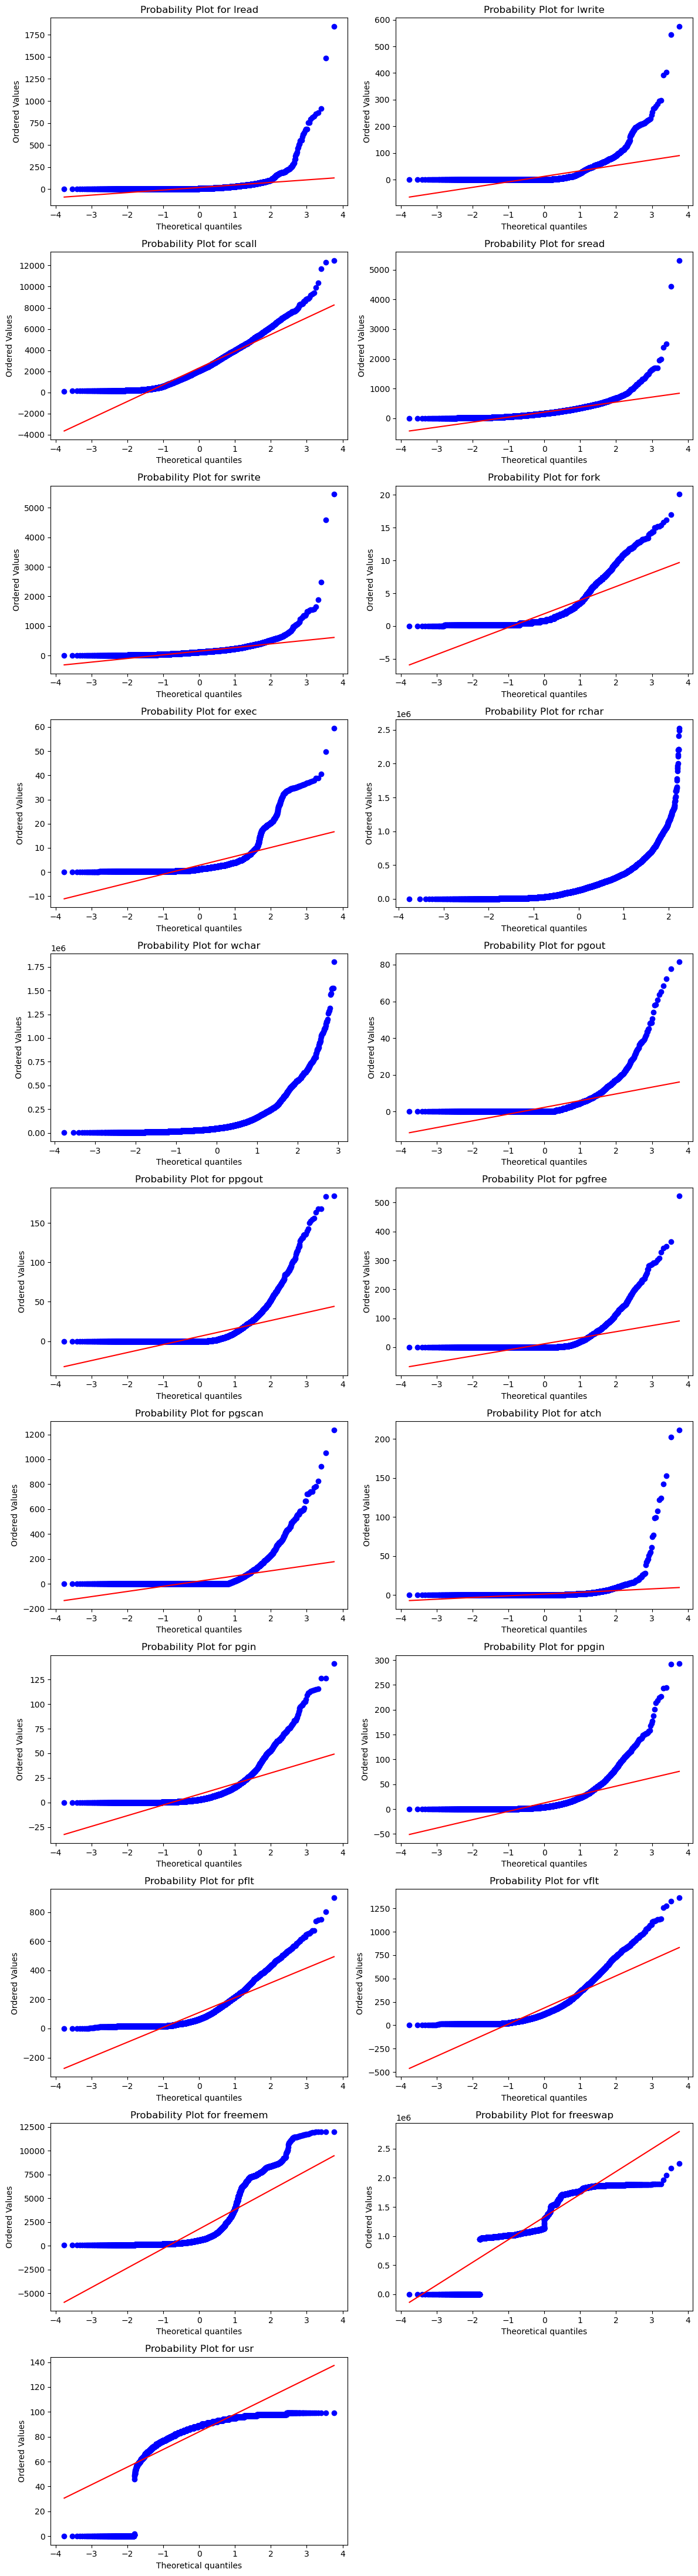

In [21]:
# Calculate the number of rows and columns for the subplots
num_numerical_columns = len(numeric_df.columns)
num_rows = math.ceil(num_numerical_columns / 2)
num_cols = min(num_numerical_columns, 2)

# Create a figure with the dynamically calculated grid size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))

# Flatten the axes array if it's not already flattened
if num_rows > 1 and num_cols > 1:
    axes = axes.flatten()
elif num_rows == 1 or num_cols == 1:
    axes = [axes]
    # Loop through numerical columns
for i, column in enumerate(numeric_df.columns):
    st.probplot(numeric_df[column], dist='norm', plot=axes[i])
    axes[i].set_title(f'Probability Plot for {column}')
    axes[i].tick_params(axis='both', rotation=0)

# Remove any unused subplots
for j in range(num_numerical_columns, len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [22]:
nd=[]
nnd=[]
for column in numeric_df.columns:
    statistic,pvalue=shapiro(numeric_df[column])
    print(f'P-Value of {column}',pvalue)
    if pvalue<=0.05:
        print('Data is not Normal distributed')
        nnd.append(column)
    else:
        print('Data is Normal Distributed')
        nd.append(column)

P-Value of lread 0.0
Data is not Normal distributed
P-Value of lwrite 0.0
Data is not Normal distributed
P-Value of scall 0.0
Data is not Normal distributed
P-Value of sread 0.0
Data is not Normal distributed
P-Value of swrite 0.0
Data is not Normal distributed
P-Value of fork 0.0
Data is not Normal distributed
P-Value of exec 0.0
Data is not Normal distributed
P-Value of rchar 1.0
Data is Normal Distributed
P-Value of wchar 1.0
Data is Normal Distributed
P-Value of pgout 0.0
Data is not Normal distributed
P-Value of ppgout 0.0
Data is not Normal distributed
P-Value of pgfree 0.0
Data is not Normal distributed
P-Value of pgscan 0.0
Data is not Normal distributed
P-Value of atch 0.0
Data is not Normal distributed
P-Value of pgin 0.0
Data is not Normal distributed
P-Value of ppgin 0.0
Data is not Normal distributed
P-Value of pflt 0.0
Data is not Normal distributed
P-Value of vflt 0.0
Data is not Normal distributed
P-Value of freemem 0.0
Data is not Normal distributed
P-Value of freeswap

In [23]:
nnd

['lread',
 'lwrite',
 'scall',
 'sread',
 'swrite',
 'fork',
 'exec',
 'pgout',
 'ppgout',
 'pgfree',
 'pgscan',
 'atch',
 'pgin',
 'ppgin',
 'pflt',
 'vflt',
 'freemem',
 'freeswap',
 'usr']

In [24]:
nd

['rchar', 'wchar']

In [25]:
numeric_df.columns

Index(['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar',
       'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin',
       'pflt', 'vflt', 'freemem', 'freeswap', 'usr'],
      dtype='object')

In [26]:
categorical_df.columns

Index(['runqsz'], dtype='object')

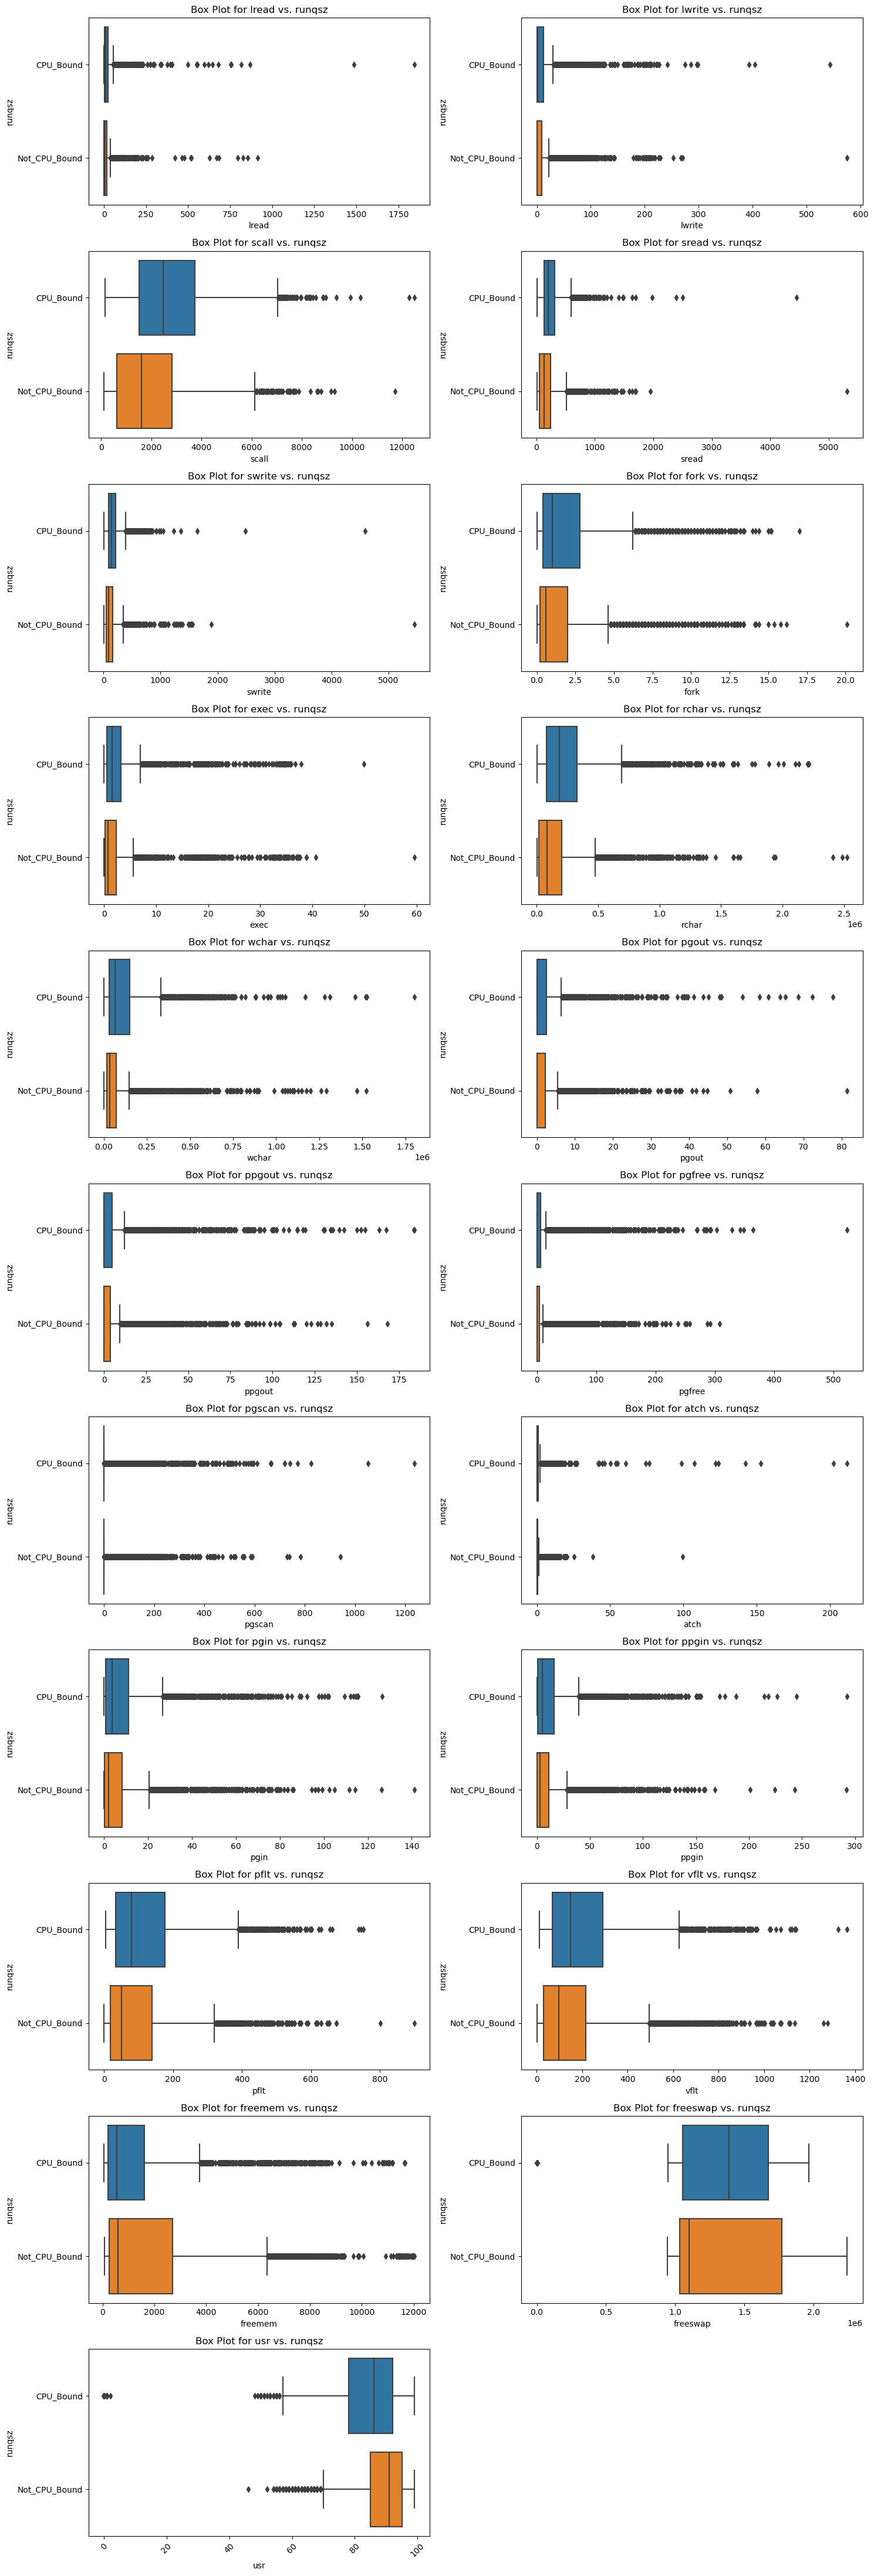

In [27]:
fixed_categorical_column='runqsz'
# Get the number of numerical columns
num_numerical_columns = len(numeric_df.columns)

# Calculate the number of rows and columns for the subplots
num_rows = math.ceil(num_numerical_columns / 2)
num_cols = min(num_numerical_columns, 2)

# Create a figure with the dynamically calculated grid size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

# Flatten the axes array if it's not already flattened
if num_rows > 1 and num_cols > 1:
    axes = axes.flatten()
elif num_rows == 1 or num_cols == 1:
    axes = [axes]

# Loop through numerical columns
for i, numerical_column in enumerate(numeric_df.columns):
    sns.boxplot(y=fixed_categorical_column, x=numerical_column, data=pd.concat([categorical_df, numeric_df], axis=1), ax=axes[i])
    axes[i].set_title(f'Box Plot for {numerical_column} vs. {fixed_categorical_column}')
    axes[i].set_ylabel(fixed_categorical_column)
    axes[i].set_xlabel(numerical_column)
axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(num_numerical_columns, len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


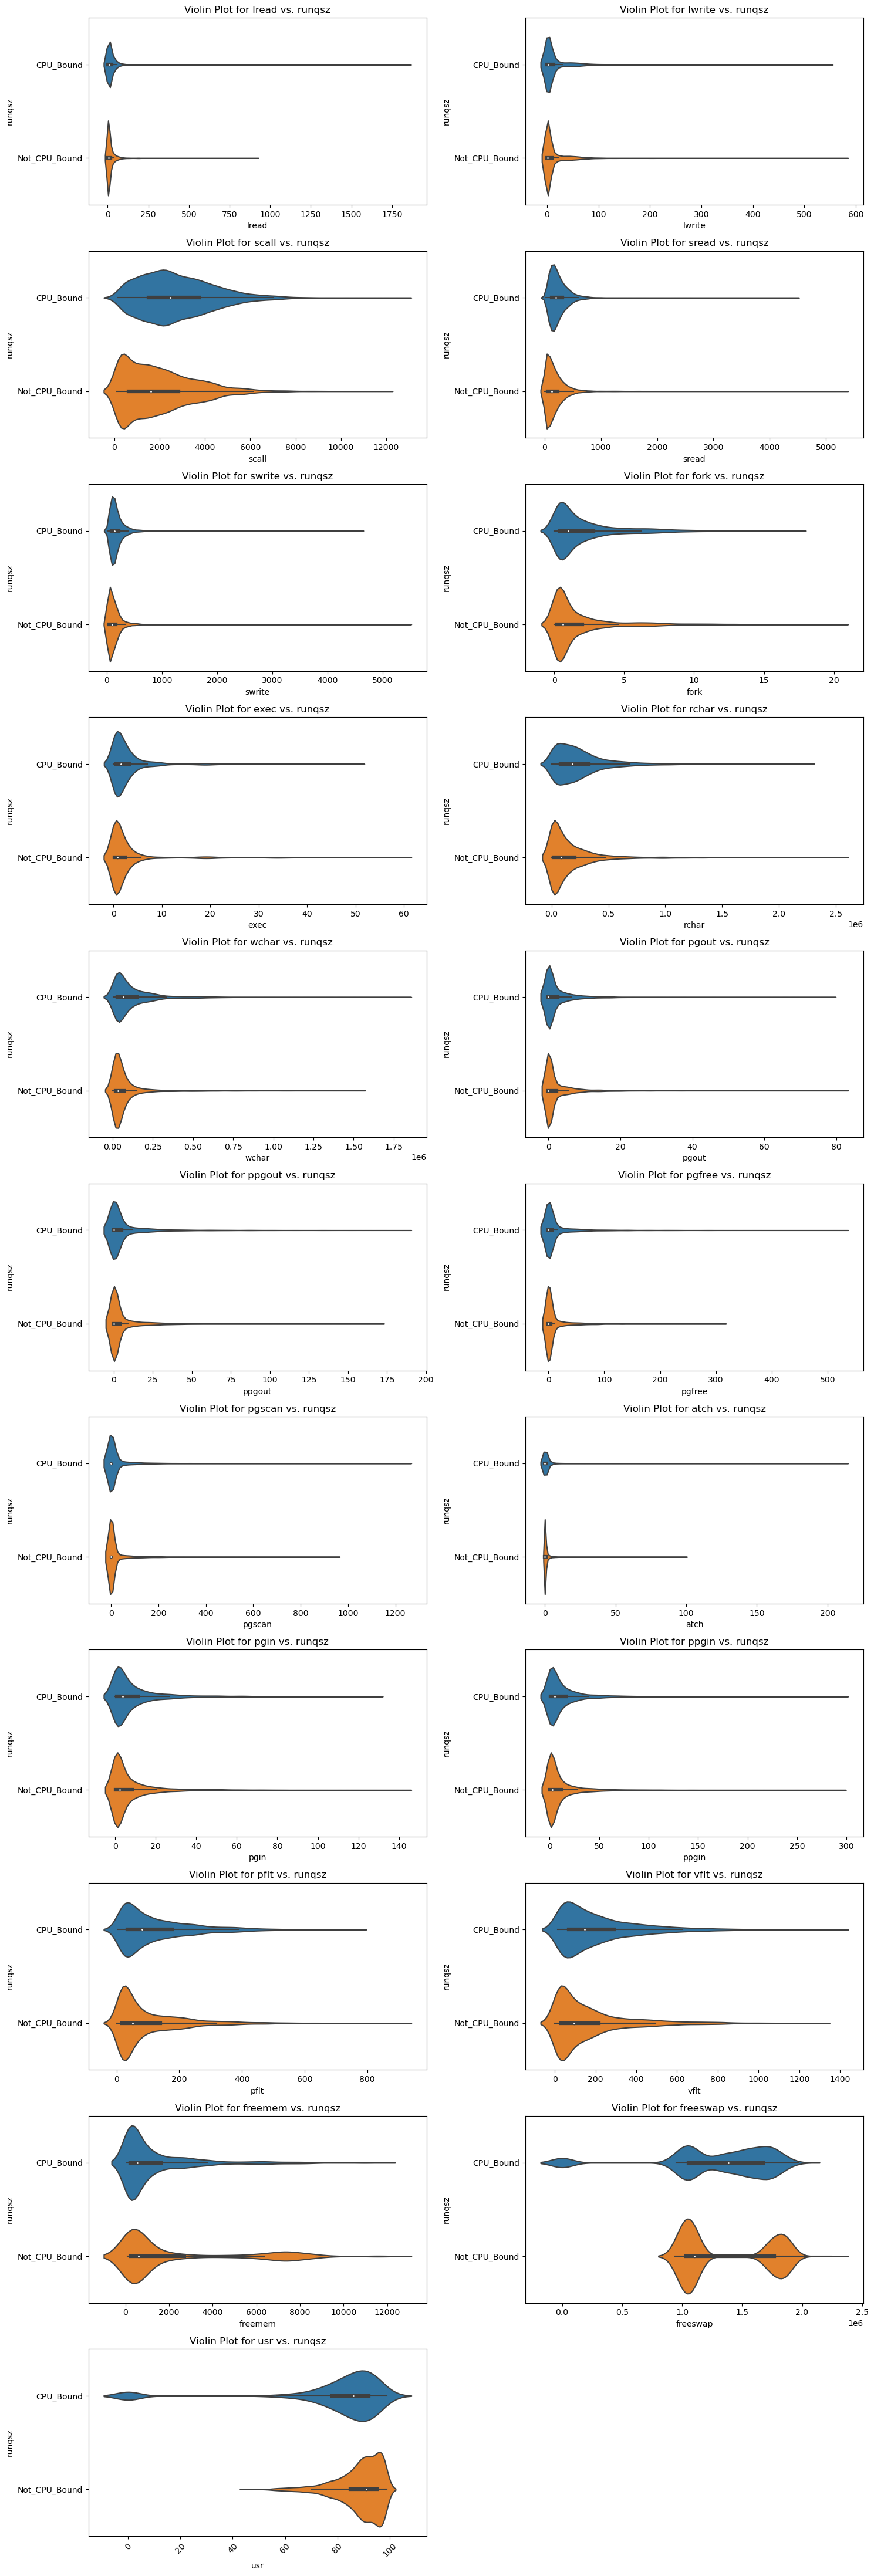

In [28]:
# Get the number of numerical columns
num_numerical_columns = len(numeric_df.columns)

# Calculate the number of rows and columns for the subplots
num_rows = math.ceil(num_numerical_columns / 2)
num_cols = min(num_numerical_columns, 2)

# Create a figure with the dynamically calculated grid size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

# Flatten the axes array if it's not already flattened
if num_rows > 1 and num_cols > 1:
    axes = axes.flatten()
elif num_rows == 1 or num_cols == 1:
    axes = [axes]

# Loop through numerical columns
for i, numerical_column in enumerate(numeric_df.columns):
    sns.violinplot(y=fixed_categorical_column, x=numerical_column, data=pd.concat([categorical_df, numeric_df], axis=1), ax=axes[i])
    axes[i].set_title(f'Violin Plot for {numerical_column} vs. {fixed_categorical_column}')
    axes[i].set_ylabel(fixed_categorical_column)
    axes[i].set_xlabel(numerical_column)
axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(num_numerical_columns, len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


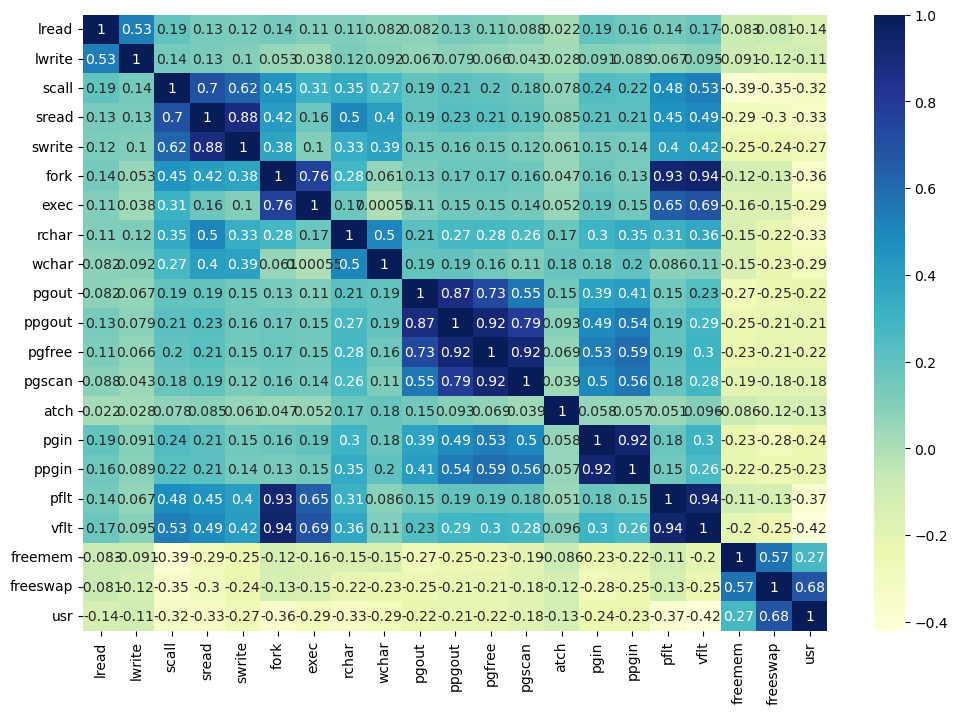

In [29]:
plt.figure(figsize=(12,8))
dataplot = sns.heatmap(numeric_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [30]:
numeric_df.corr()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgfree,pgscan,atch,pgin,ppgin,pflt,vflt,freemem,freeswap,usr
lread,1.000000,0.533737,0.191377,0.132881,0.119953,0.140284,0.110965,0.107973,0.081571,0.082463,...,0.114438,0.087783,0.021563,0.189799,0.161345,0.137463,0.165539,-0.083214,-0.081293,-0.141394
lwrite,0.533737,1.000000,0.143404,0.128403,0.101524,0.052511,0.038237,0.115121,0.091718,0.067013,...,0.065692,0.042608,0.028310,0.091068,0.089011,0.067024,0.094965,-0.091133,-0.116478,-0.111213
scall,0.191377,0.143404,1.000000,0.696887,0.619984,0.446766,0.308999,0.351413,0.274092,0.194529,...,0.199778,0.177908,0.077969,0.241628,0.219070,0.481781,0.531760,-0.387520,-0.350629,-0.323188
sread,0.132881,0.128403,0.696887,1.000000,0.881069,0.416721,0.164084,0.502397,0.401784,0.193679,...,0.212911,0.194272,0.085468,0.207012,0.210225,0.452020,0.491045,-0.286437,-0.302036,-0.332160
swrite,0.119953,0.101524,0.619984,0.881069,1.000000,0.376876,0.103643,0.331386,0.394230,0.151371,...,0.145458,0.120180,0.061373,0.147000,0.144278,0.396580,0.416571,-0.248574,-0.237062,-0.272252
fork,0.140284,0.052511,0.446766,0.416721,0.376876,1.000000,0.763974,0.281229,0.060790,0.130192,...,0.168082,0.160839,0.047194,0.163468,0.132181,0.931040,0.939348,-0.123357,-0.130442,-0.363277
exec,0.110965,0.038237,0.308999,0.164084,0.103643,0.763974,1.000000,0.169189,0.000547,0.111465,...,0.146163,0.144855,0.052307,0.186099,0.149911,0.645239,0.691754,-0.158565,-0.153347,-0.288526
rchar,0.107973,0.115121,0.351413,0.502397,0.331386,0.281229,0.169189,1.000000,0.503531,0.211268,...,0.277786,0.259446,0.171532,0.299784,0.347224,0.313246,0.363799,-0.149485,-0.220608,-0.329737
wchar,0.081571,0.091718,0.274092,0.401784,0.394230,0.060790,0.000547,0.503531,1.000000,0.192436,...,0.159229,0.113638,0.181408,0.178290,0.200880,0.086128,0.111082,-0.149060,-0.226044,-0.288974
pgout,0.082463,0.067013,0.194529,0.193679,0.151371,0.130192,0.111465,0.211268,0.192436,1.000000,...,0.730381,0.553916,0.147759,0.385648,0.414865,0.151285,0.229129,-0.269687,-0.245378,-0.221877


In [31]:
# Find pairs of columns with correlations above 0.7
highly_correlated_pairs = []
# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Iterate through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:  # Adjust the threshold as needed
            colname1 = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            correlation_value = correlation_matrix.iloc[i, j]
            highly_correlated_pairs.append((colname1, colname2, correlation_value))

# Print the highly correlated pairs
print("Highly correlated pairs with correlation above 0.7:")
for pair in highly_correlated_pairs:
    col1, col2, correlation = pair
    print(f"{col1} and {col2}: Correlation = {correlation:.2f}")

Highly correlated pairs with correlation above 0.7:
swrite and sread: Correlation = 0.88
exec and fork: Correlation = 0.76
ppgout and pgout: Correlation = 0.87
pgfree and pgout: Correlation = 0.73
pgfree and ppgout: Correlation = 0.92
pgscan and ppgout: Correlation = 0.79
pgscan and pgfree: Correlation = 0.92
ppgin and pgin: Correlation = 0.92
pflt and fork: Correlation = 0.93
vflt and fork: Correlation = 0.94
vflt and pflt: Correlation = 0.94


In [32]:


# Find correlations with respect to the output variable above 0.7
output_correlations = correlation_matrix['usr']

# Filter correlations above the threshold (e.g., 0.7)
highly_correlated_with_output = output_correlations[abs(output_correlations) > 0.1]

# Print the highly correlated columns with respect to the output variable
print("Numerical columns highly correlated with the output variable:")
print(highly_correlated_with_output)

Numerical columns highly correlated with the output variable:
lread      -0.141394
lwrite     -0.111213
scall      -0.323188
sread      -0.332160
swrite     -0.272252
fork       -0.363277
exec       -0.288526
rchar      -0.329737
wchar      -0.288974
pgout      -0.221877
ppgout     -0.212295
pgfree     -0.216278
pgscan     -0.181488
atch       -0.125074
pgin       -0.241720
ppgin      -0.233682
pflt       -0.372495
vflt       -0.420685
freemem     0.270308
freeswap    0.678526
usr         1.000000
Name: usr, dtype: float64


In [33]:
numeric_df['rchar']=numeric_df['rchar'].fillna(numeric_df['rchar'].median())
numeric_df['wchar']=numeric_df['wchar'].fillna(numeric_df['wchar'].median())

In [34]:
numeric_df.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
freemem     0
freeswap    0
usr         0
dtype: int64

In [35]:
categorical_df.isnull().sum()

runqsz    0
dtype: int64

In [36]:
# Initialize an empty dictionary to store zero counts
zero_counts = {}

# Loop through columns and count zeros
for column in numeric_df.columns:
    zero_counts[column] = (numeric_df[column] == 0).sum()

# Print the dictionary
print(zero_counts)

{'lread': 675, 'lwrite': 2684, 'scall': 0, 'sread': 0, 'swrite': 0, 'fork': 21, 'exec': 21, 'rchar': 0, 'wchar': 0, 'pgout': 4878, 'ppgout': 4878, 'pgfree': 4869, 'pgscan': 6448, 'atch': 4575, 'pgin': 1220, 'ppgin': 1220, 'pflt': 3, 'vflt': 0, 'freemem': 0, 'freeswap': 0, 'usr': 283}


In [37]:
(categorical_df['runqsz']==0).sum()

0

In [38]:
df.duplicated().sum()

0

In [39]:
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()

In [40]:
outlier_counts = {}

In [41]:
for column in numeric_df.columns:
    outlier_counts[column] = count_outliers(numeric_df[column])

In [42]:
outlier_counts

{'lread': 753,
 'lwrite': 1305,
 'scall': 108,
 'sread': 340,
 'swrite': 495,
 'fork': 943,
 'exec': 710,
 'rchar': 465,
 'wchar': 817,
 'pgout': 988,
 'ppgout': 1315,
 'pgfree': 1555,
 'pgscan': 1744,
 'atch': 1209,
 'pgin': 789,
 'ppgin': 821,
 'pflt': 395,
 'vflt': 484,
 'freemem': 1185,
 'freeswap': 294,
 'usr': 430}

In [43]:
# Define a function to replace outliers in a column with bounds
def replace_outliers_with_bounds(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.clip(lower=lower_bound, upper=upper_bound)

In [44]:
numeric_df_cleaned = numeric_df.apply(replace_outliers_with_bounds)

In [45]:
outlier_counts_clean={}

In [46]:
for column in numeric_df_cleaned.columns:
    outlier_counts_clean[column] = count_outliers(numeric_df_cleaned[column])

In [47]:
outlier_counts_clean

{'lread': 0,
 'lwrite': 0,
 'scall': 0,
 'sread': 0,
 'swrite': 0,
 'fork': 0,
 'exec': 0,
 'rchar': 0,
 'wchar': 0,
 'pgout': 0,
 'ppgout': 0,
 'pgfree': 0,
 'pgscan': 0,
 'atch': 0,
 'pgin': 0,
 'ppgin': 0,
 'pflt': 0,
 'vflt': 0,
 'freemem': 0,
 'freeswap': 0,
 'usr': 0}

In [48]:
categorical_df = pd.get_dummies(categorical_df, drop_first=True)

categorical_df

,runqsz_Not_CPU_Bound
0,0
1,1
2,1
3,1
4,1
...,...
8187,0
8188,1
8189,1
8190,0


In [49]:
data=pd.concat([categorical_df, numeric_df_cleaned], axis=1)

In [50]:
#Split Data
# independent variables
X = data.drop(["usr"], axis=1)
# dependent variable
y = data[["usr"]]

In [51]:
#We will now split X and y into train and test sets in a 70:30 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [52]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X.columns) 
X_test = pd.DataFrame(scaler.fit_transform(X_test),columns=X.columns) 
y_train = pd.DataFrame(scaler.fit_transform(y_train),columns=y.columns) 
y_test = pd.DataFrame(scaler.fit_transform(y_test),columns=y.columns) 

In [53]:
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

In [54]:
# Fit the OLS model with scaled and DataFrame data
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1115.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:32:04   Log-Likelihood:                -3577.2
No. Observations:                5734   AIC:                             7196.
Df Residuals:                    5713   BIC:                             7336.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.472e-16 

In [55]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

runqsz_Not_CPU_Bound     1.156815
lread                    5.350560
lwrite                   4.328397
scall                    2.960609
sread                    6.420172
swrite                   5.597135
fork                    13.035359
exec                     3.241417
rchar                    2.133616
wchar                    1.584381
pgout                   11.360363
ppgout                  29.404223
pgfree                  16.496748
pgscan                        NaN
atch                     1.875901
pgin                    13.809339
ppgin                   13.951855
pflt                    12.001460
vflt                    15.971049
freemem                  1.961304
freeswap                 1.841239
dtype: float64



In [56]:
#1) Removing predictor 'ppgout' as VIF>2
X_train2 = X_train.drop(["ppgout"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [57]:
#2) Removing predictor 'pgfree' as VIF>2
X_train3 = X_train.drop(["pgfree"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [58]:
#3) Removing predictor 'vflt' as VIF>2
X_train4 = X_train.drop(["pgfree",'ppgout'], axis=1)
olsmod_3 = sm.OLS(y_train, X_train4)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [59]:
#4) Removing predictor 'vflt' as VIF>2
X_train5 = X_train.drop(["vflt"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train5)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),)

R-squared: 0.796 
Adjusted R-squared: 0.795


In [60]:
#4) Removing predictor 'vflt', 'pgfree' as VIF>2
X_train6 = X_train.drop(["vflt",'pgfree'], axis=1)
olsmod_5 = sm.OLS(y_train, X_train6)
olsres_5 = olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 3),)

R-squared: 0.795 
Adjusted R-squared: 0.795


In [61]:
# Fit the OLS model with scaled and DataFrame data
model2 = sm.OLS(y_train, sm.add_constant(X_train2)).fit()

# Print the model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1174.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:32:05   Log-Likelihood:                -3577.7
No. Observations:                5734   AIC:                             7195.
Df Residuals:                    5714   BIC:                             7328.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.472e-16 

In [62]:
# Fit the OLS model with scaled and DataFrame data
model3 = sm.OLS(y_train, sm.add_constant(X_train6)).fit()

# Print the model summary
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1235.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:32:06   Log-Likelihood:                -3585.9
No. Observations:                5734   AIC:                             7210.
Df Residuals:                    5715   BIC:                             7336.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.472e-16 

In [63]:
#4) Removing predictor 'vflt', 'pgfree' as VIF>2
X_train7 = X_train.drop(["vflt",'pgfree','sread','fork','exec','ppgout'], axis=1)
olsmod_6 = sm.OLS(y_train, X_train7)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),)

R-squared: 0.793 
Adjusted R-squared: 0.793


In [64]:
# Fit the OLS model with scaled and DataFrame data
model4 = sm.OLS(y_train, sm.add_constant(X_train7)).fit()

# Print the model summary
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     1569.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:32:06   Log-Likelihood:                -3615.0
No. Observations:                5734   AIC:                             7260.
Df Residuals:                    5719   BIC:                             7360.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.472e-16 

In [65]:
# let's check the VIF of the predictors


vif_series2 = pd.Series(
    [variance_inflation_factor(X_train7.values, i) for i in range(X_train7.shape[1])],
    index=X_train7.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

runqsz_Not_CPU_Bound     1.155396
lread                    5.250889
lwrite                   4.274981
scall                    2.525449
swrite                   2.727386
rchar                    1.704889
wchar                    1.528708
pgout                    2.045113
pgscan                        NaN
atch                     1.854968
pgin                    13.544677
ppgin                   13.751828
pflt                     1.899607
freemem                  1.940457
freeswap                 1.768893
dtype: float64



In [66]:
#4) Removing predictor 'vflt', 'pgfree' as VIF>2
X_train8 = X_train.drop(["vflt",'pgfree','sread','fork','exec','ppgout','ppgin'], axis=1)
olsmod_7 = sm.OLS(y_train, X_train8)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),)

R-squared: 0.793 
Adjusted R-squared: 0.793


In [67]:
# Fit the OLS model with scaled and DataFrame data
model5 = sm.OLS(y_train, sm.add_constant(X_train8)).fit()

# Print the model summary
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     1686.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:32:06   Log-Likelihood:                -3620.1
No. Observations:                5734   AIC:                             7268.
Df Residuals:                    5720   BIC:                             7361.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.472e-16 

In [68]:
# let's check the VIF of the predictors


vif_series3= pd.Series(
    [variance_inflation_factor(X_train8.values, i) for i in range(X_train8.shape[1])],
    index=X_train8.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

VIF values: 

runqsz_Not_CPU_Bound    1.155105
lread                   5.220139
lwrite                  4.264185
scall                   2.524012
swrite                  2.727378
rchar                   1.672416
wchar                   1.528708
pgout                   2.028925
pgscan                       NaN
atch                    1.854428
pgin                    1.485904
pflt                    1.891179
freemem                 1.940421
freeswap                1.766375
dtype: float64



In [69]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_7.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_7.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,0.479106,0.493819,-0.014713
1,0.785616,0.544981,0.240634
2,-2.534905,-1.261685,-1.273219
3,-0.338253,-0.536564,0.198311
4,0.785616,1.270607,-0.484991


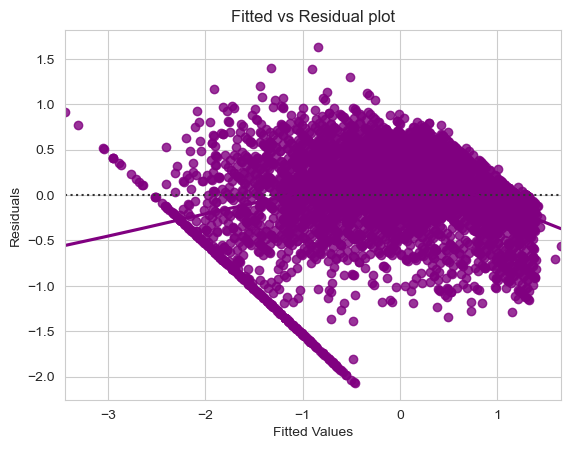

In [70]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

In [81]:
import scipy.stats as stats
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9466460943222046, pvalue=2.1320756134702092e-41)

In [82]:
import statsmodels.stats.api as sms
sms.het_goldfeldquandt(df_pred["Residuals"], X_train8)[1]

0.0017689154660894954

In [73]:
# Let us write the equation of linear regression
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train8.columns)):
    if i == 0:
        print(olsres_7.params[i], "+", end=" ")
    elif i != len(X_train8.columns) - 1:
        print(
            olsres_7.params[i],
            "* (",
            X_train8.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_7.params[i], "* (", X_train8.columns[i], ")")

usr = 0.08181000519668097 + -0.11528729637551825 * ( lread ) +  0.05553957968933829 * ( lwrite ) +  -0.12425669641237155 * ( scall ) +  -0.033445584589302926 * ( swrite ) +  -0.09900603129211 * ( rchar ) +  -0.03950309658409308 * ( wchar ) +  -0.07851979773686377 * ( pgout ) +  5.37057770323832e-16 * ( pgscan ) +  0.03132563925705893 * ( atch ) +  -0.06881828126144639 * ( pgin ) +  -0.4686399413986766 * ( pflt ) +  -0.07465132811994951 * ( freemem ) +  0.3819282657816855 * ( freeswap )


#Predictions

In [74]:
X_train8.columns

Index(['runqsz_Not_CPU_Bound', 'lread', 'lwrite', 'scall', 'swrite', 'rchar',
       'wchar', 'pgout', 'pgscan', 'atch', 'pgin', 'pflt', 'freemem',
       'freeswap'],
      dtype='object')

In [75]:
X_test.columns

Index(['runqsz_Not_CPU_Bound', 'lread', 'lwrite', 'scall', 'sread', 'swrite',
       'fork', 'exec', 'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan',
       'atch', 'pgin', 'ppgin', 'pflt', 'vflt', 'freemem', 'freeswap'],
      dtype='object')

In [76]:
# dropping columns from the test data that are not there in the training data
X_test2 = X_test.drop(
    ["vflt",'pgfree','sread','fork','exec','ppgout','ppgin'], axis=1
)

In [77]:
# let's make predictions on the test set
y_pred_test = olsres_7.predict(X_test2)
y_pred_train = olsres_7.predict(X_train8)

In [78]:
# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [79]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse1

0.4549321433414322

In [80]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse2

0.4860244386185495